# Análisis Exploratorio de Datos Homicidios - Víctimas

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

***Se importan las librerias que se van a usar***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import locale

***Se cargan los datos del dataset ya transformado***

In [3]:
mortalidad = pd.read_excel("victimas_listo.xlsx")

In [4]:
print(mortalidad .shape)
mortalidad .head()

(608, 10)


,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01
4,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24


# 4.1 Análisis univariable
Permite comprender las características generales de cada variable de nuestro set de datos homicidios - victimas. Iniciemos en las variables categóricas.

### **Análisis de las variables categóricas: 'ROL', 'VICTIMA', 'SEXO'** 

In [5]:
mortalidad .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             608 non-null    object        
 1   FECHA                608 non-null    datetime64[ns]
 2   AAAA                 608 non-null    int64         
 3   MM                   608 non-null    int64         
 4   DD                   608 non-null    int64         
 5   ROL                  608 non-null    object        
 6   VICTIMA              608 non-null    object        
 7   SEXO                 608 non-null    object        
 8   EDAD                 608 non-null    int64         
 9   FECHA_FALLECIMIENTO  608 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 47.6+ KB


**Se grafica para una mejor visualización**

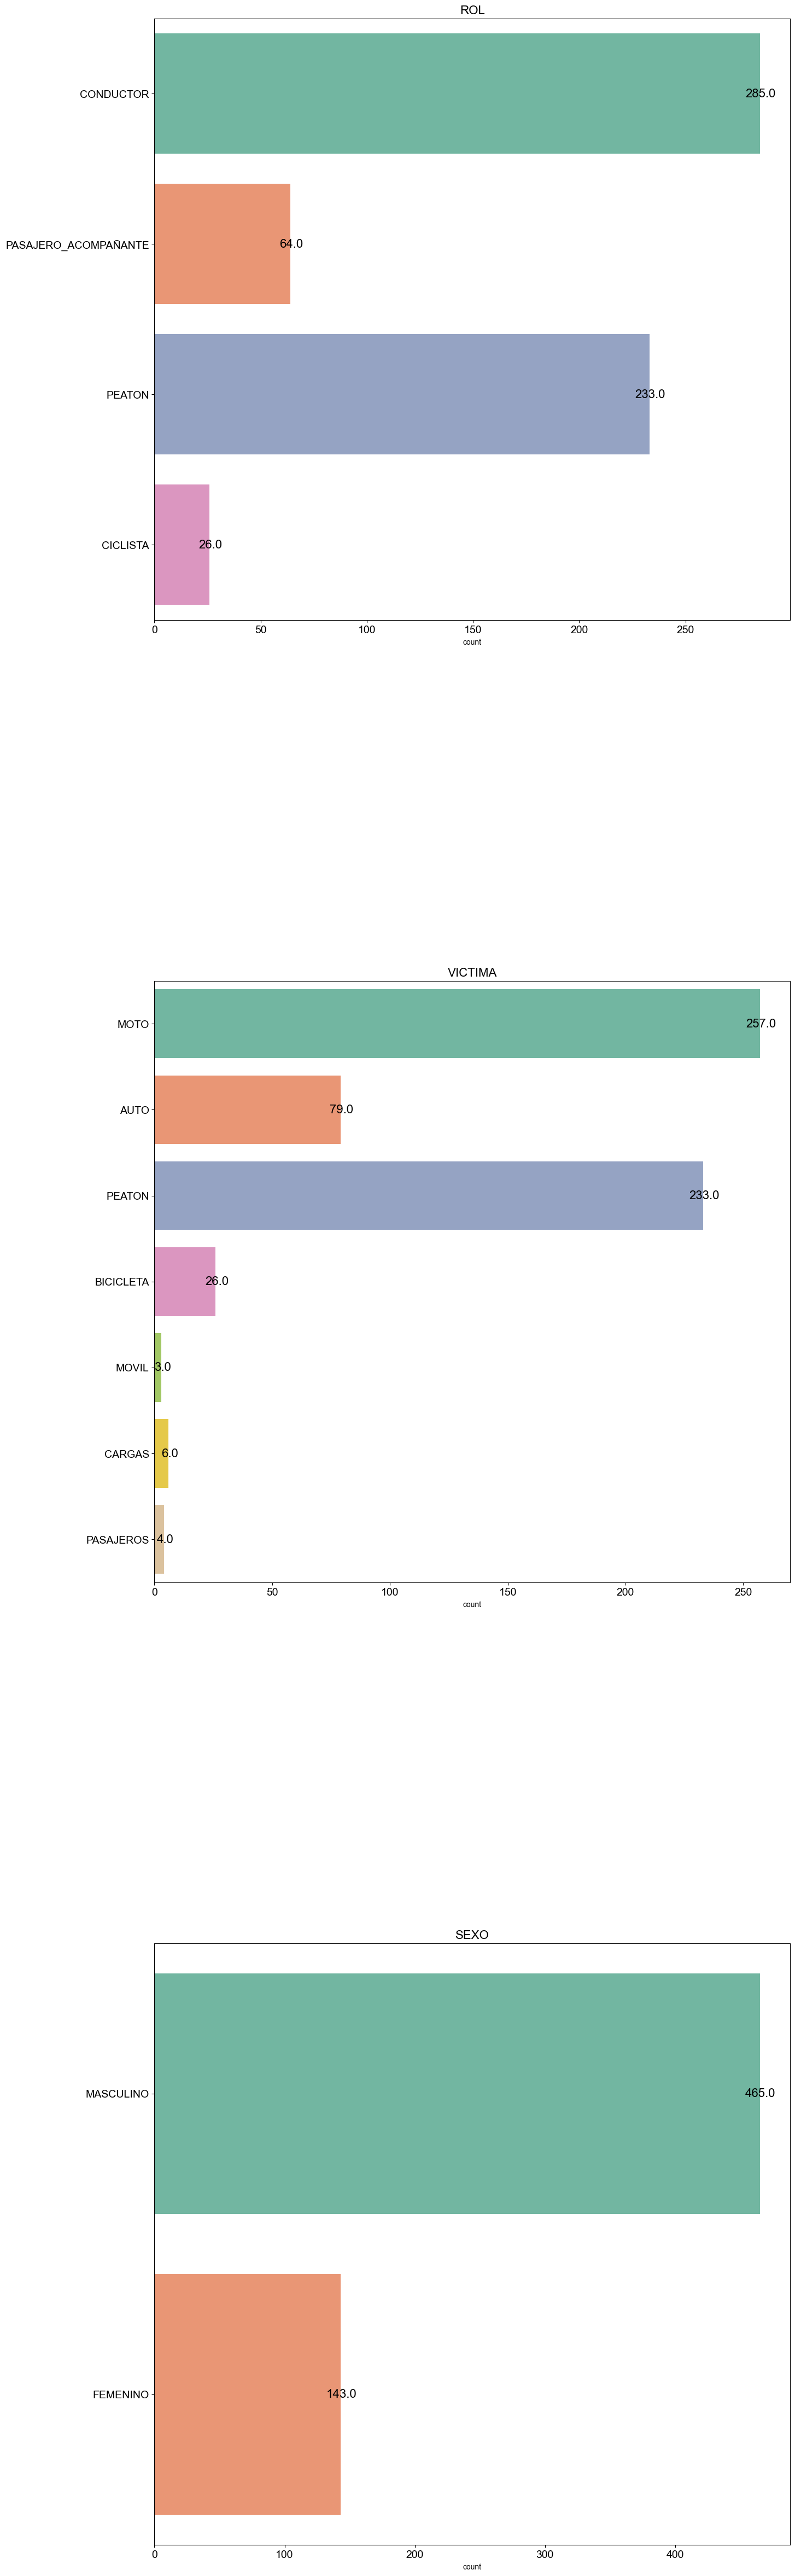

Análisis de la variable 'ROL':
ROL
CONDUCTOR               285
PEATON                  233
PASAJERO_ACOMPAÑANTE     64
CICLISTA                 26
Name: count, dtype: int64


Análisis de la variable 'VICTIMA':
VICTIMA
MOTO         257
PEATON       233
AUTO          79
BICICLETA     26
CARGAS         6
PASAJEROS      4
MOVIL          3
Name: count, dtype: int64


Análisis de la variable 'SEXO':
SEXO
MASCULINO    465
FEMENINO     143
Name: count, dtype: int64




In [6]:
# Visualización de los datos
plt.rcParams['font.family'] = 'Arial'
col_cat = ['ROL', 'VICTIMA', 'SEXO']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(15, 60))  
fig.subplots_adjust(hspace=0.6) 

# Iterar sobre cada variable categórica
for i, col in enumerate(col_cat):
    # Crear el gráfico de conteo
    sns.countplot(y=col, data=mortalidad, ax=ax[i], hue=col, palette='Set2', dodge=False)  
    
    ax[i].set_title(col, fontsize=16)  
    ax[i].set_ylabel('')  
    ax[i].tick_params(axis='y', labelsize=14) 
    ax[i].tick_params(axis='x', labelsize=14)  
    
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_width()}', (p.get_width() + 0.5, p.get_y() + p.get_height()/2), 
                       fontsize=16, color='black', ha='center', va='center')

plt.show()

for col in col_cat:
    counts = mortalidad[col].value_counts()
    print(f"Análisis de la variable '{col}':")
    print(counts)
    print("\n")



**Rol:** La categorías con el mayor número de casos es CONDUCTOR Y PEATONES. Este alto número sugiere que los conductores  y peatones son significativamente vulnerables y enfrentan un riesgo considerable en el contexto de la mortalidad analizada.

**Víctima:** Se resalta que los motociclistas y peatones son los grupos más vulnerables en el contexto de la mortalidad.

**Sexo:** Los datos revelan una notable disparidad en la mortalidad entre hombres y mujeres, siendo los hombres el grupo más afectado. Este hallazgo sugiere la necesidad de investigar más a fondo las causas de esta diferencia y considerar enfoques específicos para abordar la seguridad vial de los hombres.

### **Análisis de las variables numéricas** 

In [7]:
mortalidad.describe()

,FECHA,AAAA,MM,DD,EDAD,FECHA_FALLECIMIENTO
count,608,608.000000,608.000000,608.000000,608.000000,608
mean,2018-11-18 15:04:44.210526208,2018.378289,6.565789,15.799342,42.567434,2018-11-19 22:32:22.105263104
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,1.000000,2016-01-01 00:00:00
25%,2017-07-13 18:00:00,2017.000000,3.000000,9.000000,27.000000,2017-07-13 18:00:00
50%,2018-09-09 00:00:00,2018.000000,6.500000,16.000000,37.000000,2018-09-09 00:00:00
75%,2020-03-10 18:00:00,2020.000000,10.000000,23.000000,57.000000,2020-03-11 00:00:00
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,95.000000,2022-01-03 00:00:00
std,NaN,1.623039,3.597860,8.669430,19.976149,NaN


Se eliminaran columna que para el análisis no aportan información a la premisa inicial, la columna que se considera irrelevante es "ID_hecho"

In [8]:
mortalidad.drop(columns=["ID_hecho"],inplace=True)
mortalidad.columns

Index(['FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

### **Variable numérica:  "EDAD"**

**Se grafica para una mejor visualización**

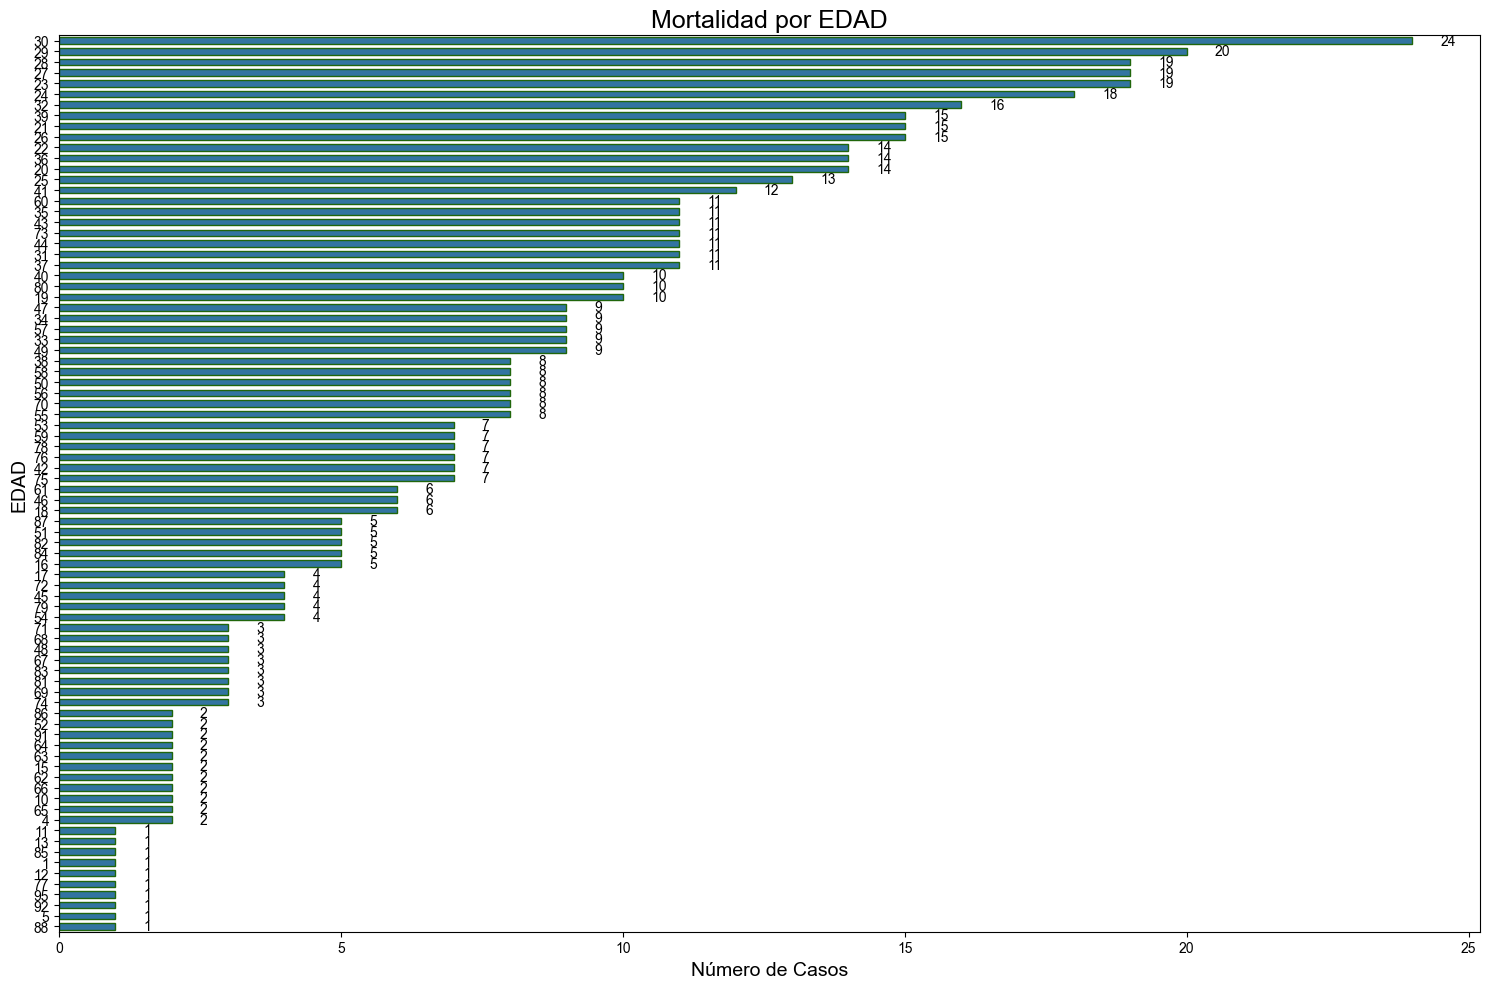

count    608.000000
mean      42.567434
std       19.976149
min        1.000000
25%       27.000000
50%       37.000000
75%       57.000000
max       95.000000
Name: EDAD, dtype: float64

In [9]:
# Visualización de los datos
plt.figure(figsize=(15, 10))

# Crear el gráfico de conteo para la variable 'EDAD'
ax = sns.countplot(y='EDAD', data=mortalidad, 
                   edgecolor='#20660b', 
                   order=mortalidad['EDAD'].value_counts().index, 
                   width=0.6)

# Configurar el título y las etiquetas de los ejes
plt.title('Mortalidad por EDAD', fontsize=18)
plt.xlabel('Número de Casos', fontsize=14)  # Cambiado a 'Número de Casos' para mayor claridad
plt.ylabel('EDAD', fontsize=14)

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2,  
            f'{int(p.get_width())}', 
            fontsize=10, color='black', ha='left', va='center')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()
mortalidad["EDAD"].describe()


EDAD: La media y la mediana indican que la mortalidad es más común entre adultos de mediana edad (alrededor de 37-42 años). La desviación estandar alta representa la variavilidad de los datos, la presencia de víctimas tan jóvenes como un año hasta la existencia de personas de hasta 95 años son muestra de lo anteriormente dicho.

### **Análisis de las variables de tiempo: 'AÑO', 'MES', 'Año_fallecimiento', 'Mes_fallecimiento' ** 

**Eventos por año**

In [10]:
mortalidad = mortalidad.rename(columns={ 'AAAA': 'AÑO'})

In [11]:
eventos_año= mortalidad['AÑO'].value_counts().sort_index()
print(eventos_año)

AÑO
2016     83
2017    125
2018    140
2019     92
2020     75
2021     93
Name: count, dtype: int64


**Se grafica para una mejor visualización**

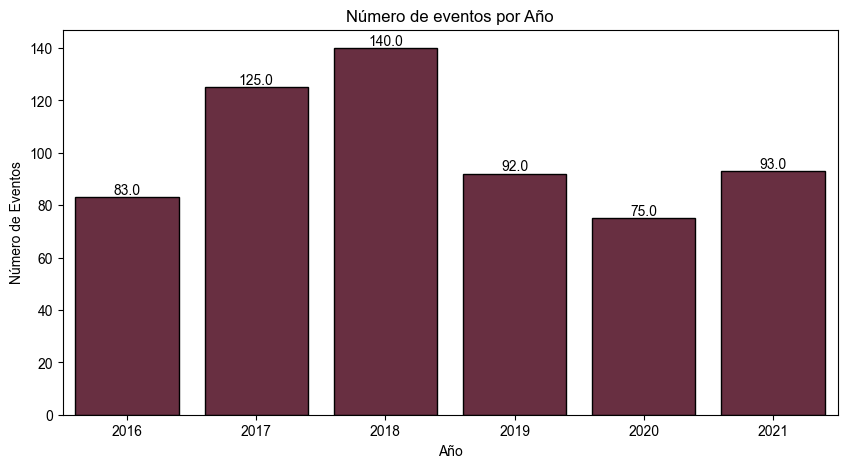

count     608.000000
mean     2018.378289
std         1.623039
min      2016.000000
25%      2017.000000
50%      2018.000000
75%      2020.000000
max      2021.000000
Name: AÑO, dtype: float64

In [12]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='AÑO', data=mortalidad, color='#71263d', edgecolor='black')

# Añadir etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Número de eventos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Eventos')
plt.show()
mortalidad["AÑO"].describe()

**Eventos por año:** El análisis sugiere que la mayoría de los eventos se concentran en torno al año 2018 por su media, con un rango que abarca desde 2016 hasta 2021. La variación moderada y los percentiles indican que hay un aumento en los eventos hacia los años más recientes

### **Eventos por mes**

In [13]:
mortalidad = mortalidad.rename(columns={ 'MM': 'MES'})

In [14]:
eventos_mes= mortalidad['MES'].value_counts().sort_index()
print(eventos_mes)

MES
1     59
2     51
3     47
4     43
5     55
6     49
7     44
8     56
9     36
10    44
11    59
12    65
Name: count, dtype: int64


**Se grafica para una mejor visualización**

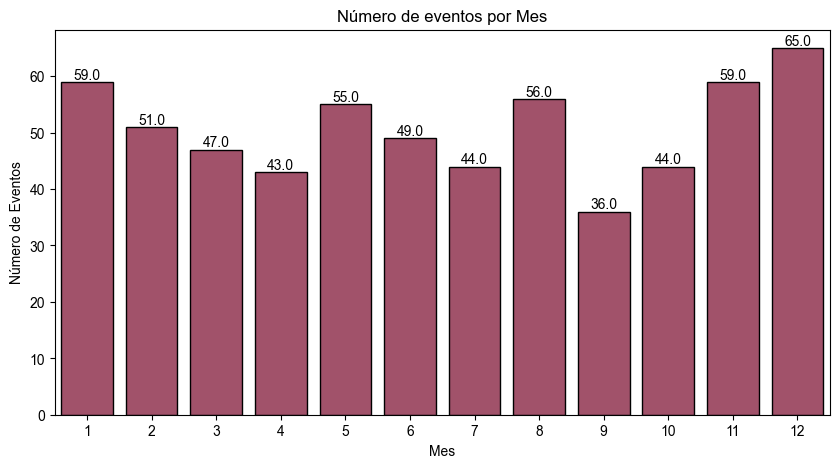

count    608.000000
mean       6.565789
std        3.597860
min        1.000000
25%        3.000000
50%        6.500000
75%       10.000000
max       12.000000
Name: MES, dtype: float64

In [15]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='MES', data=mortalidad, color='#ae4565',edgecolor='black')

# Añadir etiquetas de datos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Número de eventos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Eventos')
plt.show()
mortalidad["MES"].describe()

**Eventos por mes:** El análisis de la variable sugiere que los eventos tienden a concentrarse en la segunda mitad del año, con una media y mediana que apuntan a junio y julio como meses activos. Se nota una variabilidad alta en la distribución de eventos a lo largo del año.

### **Eventos por día**

In [16]:
mortalidad = mortalidad.rename(columns={ 'DD': 'DIA'})

**Se grafica para una mejor visualización**

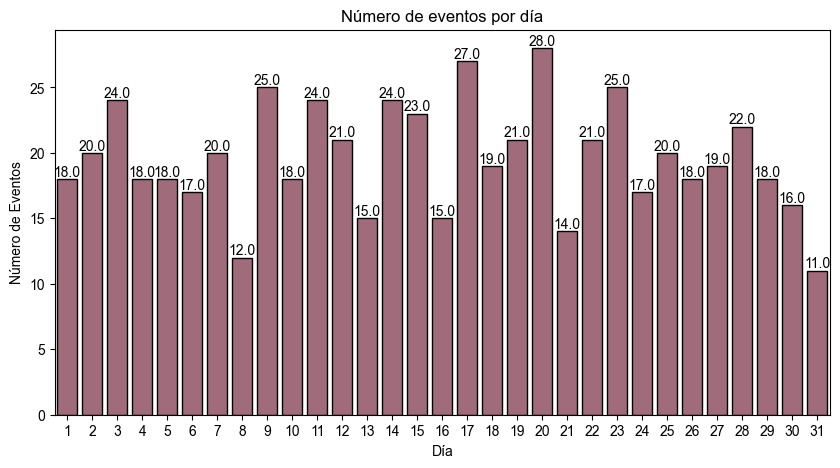

count    608.000000
mean      15.799342
std        8.669430
min        1.000000
25%        9.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: DIA, dtype: float64

In [17]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='DIA', data=mortalidad, color='#a96277', edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Número de eventos por día')
plt.xlabel('Día')
plt.ylabel('Número de Eventos')
plt.show()
mortalidad['DIA'].describe()

**Eventos por día:** La media es de aproximadamente 15.8. Esto indica que, en promedio, las observaciones son 15.8, lo que puede ser un indicativo de un nivel de incidencia moderado. La desviación estándar es de aproximadamente 8.67. Esto muestra que hay una variabilidad considerable en los datos. Un valor alto indica que algunas observaciones están muy por encima o por debajo de la media.

***Nota Importante: El analisis de Fecha de fallecimiento se realizara en el Análsis Bivariado para evitar redundancia.***
******
******

# 4.2 Análisis Bivariado

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables independientes ( 'FECHA', 'AÑO', 'MES', 'DIA', 'ROL', 'SEXO', 'EDAD','Año_fallecimiento', 'Mes_fallecimiento' ) y la variable dependiente ('VICTIMA')

#### **Análisis de la relación entre la variable numérica "EDAD" y la variable "VICTIMAS"**

***Se agrupa la variable edad por rango etáreo**


In [21]:
# Agrupar la columna EDAD en rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100]  # Intervalos de edad
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']  # Etiquetas para los rangos
mortalidad['Rango_Edad'] = pd.cut(mortalidad['EDAD'], bins=bins, labels=labels, right=False)


In [24]:
# Crear una tabla cruzada entre el rango de edad y el tipo de víctima
tabla_victima_edad = pd.crosstab(mortalidad['Rango_Edad'], mortalidad['VICTIMA'])

# Mostrar la tabla cruzada
print(tabla_victima_edad)


VICTIMA     AUTO  BICICLETA  CARGAS  MOTO  MOVIL  PASAJEROS  PEATON
Rango_Edad                                                         
0-10           0          1       0     0      0          0       3
11-20          4          2       0    15      0          0      11
21-30         19          7       1   115      1          0      23
31-40         22          1       2    70      1          0      32
41-50         12          8       2    39      0          0      21
51-60          9          4       0    14      1          0      38
61-70          3          1       1     2      0          2      27
71+           10          2       0     2      0          2      78


**Se grafica para una mejor visualización**

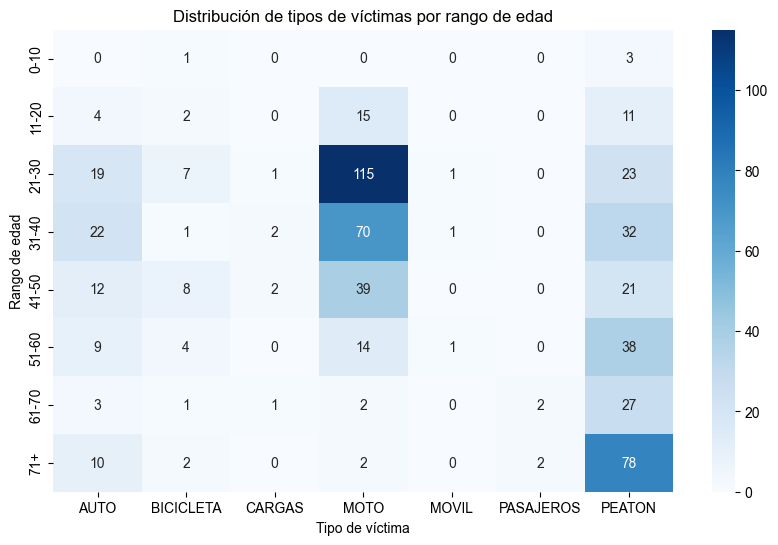

In [25]:
# Visualizacion del tipo de víctima por rangos de edad
plt.figure(figsize=(10,6))
sns.heatmap(tabla_victima_edad, cmap='Blues', annot=True, fmt='d')
plt.title('Distribución de tipos de víctimas por rango de edad')
plt.xlabel('Tipo de víctima')
plt.ylabel('Rango de edad')
plt.show()

Este análisis nos permite ver patrones claros en la relación entre la edad y los tipos de víctimas en accidentes.
Los gupos etareos más vulnerables son los rangos de edad de 21 a 30 años, seguido de el rango de 31 a 40 años y son conductores de motos. Los números descienden significativamente en los grupos de mayor edad.
Por otro lado los peatonas de mas de 71 años son los mas afectados, esto refleja una mayor vulnerabiludad de las personas mayores al caminar por las vías de la Capital. 

#### **Análisis de la relación entre la variable categórica "ROL" y la variable "VICTIMAS"**

**Se grafica para una mejor visualización**

In [29]:

# Crear la tabla para analizar la relación entre ROL y VÍCTIMA
tabla_rol = pd.crosstab(mortalidad['ROL'], mortalidad['VICTIMA'])
tabla_rol

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,PASAJEROS,PEATON
ROL,,,,,,,
CICLISTA,0,26,0,0,0,0,0
CONDUCTOR,56,0,2,226,1,0,0
PASAJERO_ACOMPAÑANTE,23,0,4,31,2,4,0
PEATON,0,0,0,0,0,0,233


**Se grafica para una mejor visualización**

<Figure size 1000x700 with 0 Axes>

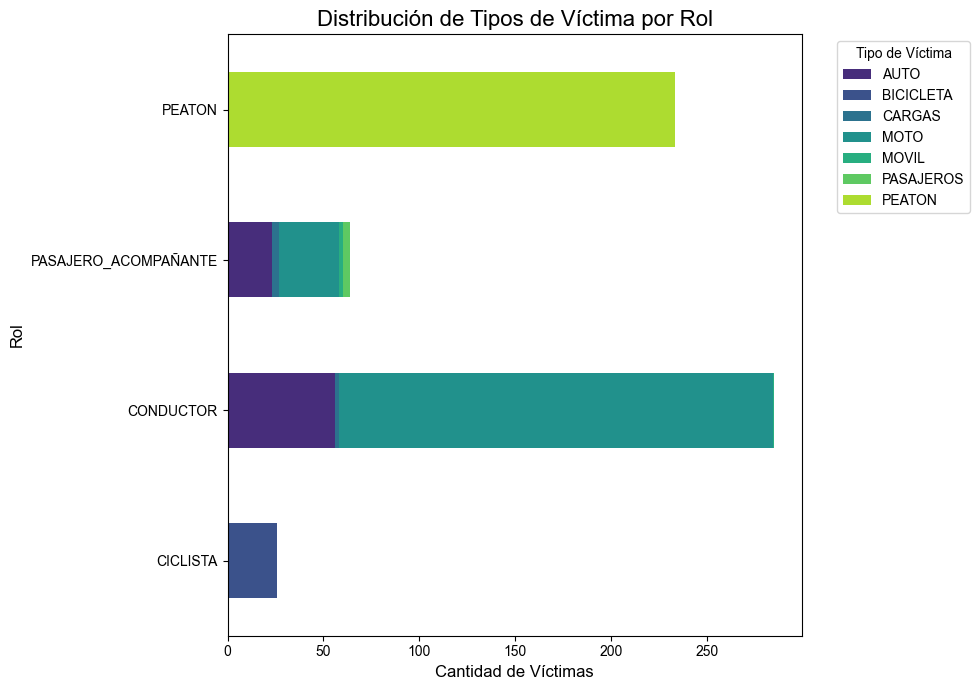

In [38]:
# Visualización de los datos 
plt.figure(figsize=(10, 7))
tabla_rol.plot(kind='barh', stacked=True, figsize=(10,7), color=sns.color_palette('viridis', n_colors=len(tabla_rol.columns)))
plt.title('Distribución de Tipos de Víctima por Rol', fontsize=16)
plt.xlabel('Cantidad de Víctimas', fontsize=12)
plt.ylabel('Rol', fontsize=12)
plt.legend(title='Tipo de Víctima', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Este análisis muestra que las motos son el vehículo con mayor número de conductores y pasajeros víctimas, mientras que el rol de peatón tiene un número significativo de víctimas sin relación directa con vehículos particulares como conductor o pasajero.

#### **Análisis de la relación entre la variable categórica "SEXO" y la variable "VICTIMA"**

In [46]:
# Agrupar los datos por 'VICTIMA' y 'SEXO'
grouped_data = mortalidad.groupby(['VICTIMA', 'SEXO']).size().unstack(fill_value=0)
grouped_data

SEXO,FEMENINO,MASCULINO
VICTIMA,,
AUTO,14,65
BICICLETA,6,20
CARGAS,0,6
MOTO,29,228
MOVIL,0,3
PASAJEROS,3,1
PEATON,91,142


**Se grafica para una mejor visualización**

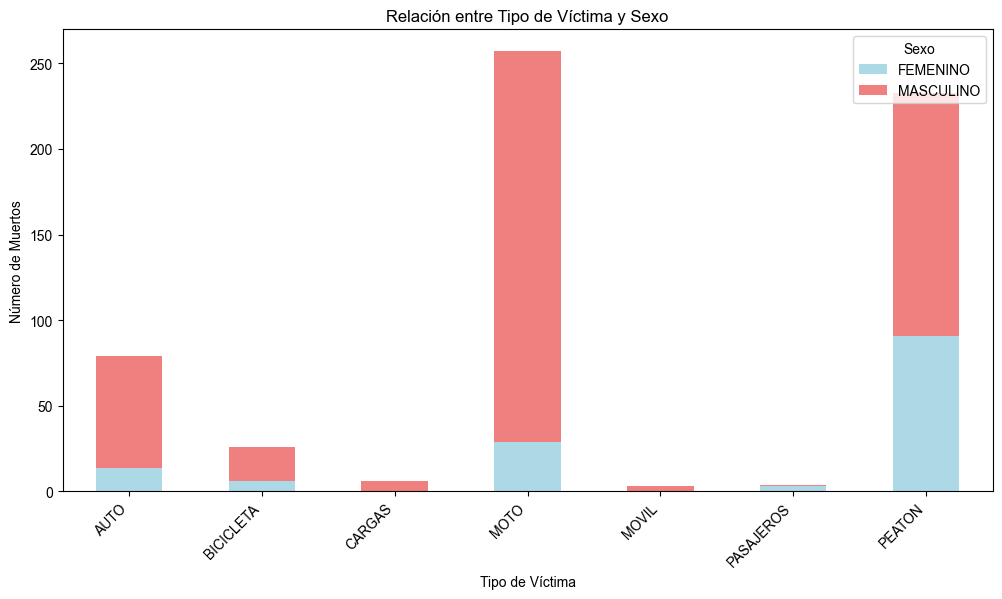

In [53]:
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=plt.gca())

# Configurar el título y las etiquetas
plt.title('Relación entre Tipo de Víctima y Sexo')
plt.ylabel('Número de Muertos')
plt.xlabel('Tipo de Víctima')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo', loc='upper right')


La mayoría de las víctimas son masculinas, con un total de 465 hombres frente a 143 mujeres. Esto puede reflejar diferencias en comportamiento de riesgo entre sexos o patrones de movilidad, también se peude concluir que los accidentes de moto y automovilísticos son los más letales, especialmente para hombres. Aunque los hombres son más propensos a sufrir accidentes de tránsito, el número significativo de mujeres como peatones sugiere que se debe prestar atención a la seguridad vial para ambos géneros.


#### **Análisis de la relación entre la variable categórica "AÑO" y la variable "VICTIMA"**

In [47]:
# Agrupar por 'AÑO' y 'VICTIMA' para contar el número de víctimas
victimas_por_anio = mortalidad.groupby(['AÑO', 'VICTIMA']).size().unstack(fill_value=0)


**Se grafica para una mejor visualización**

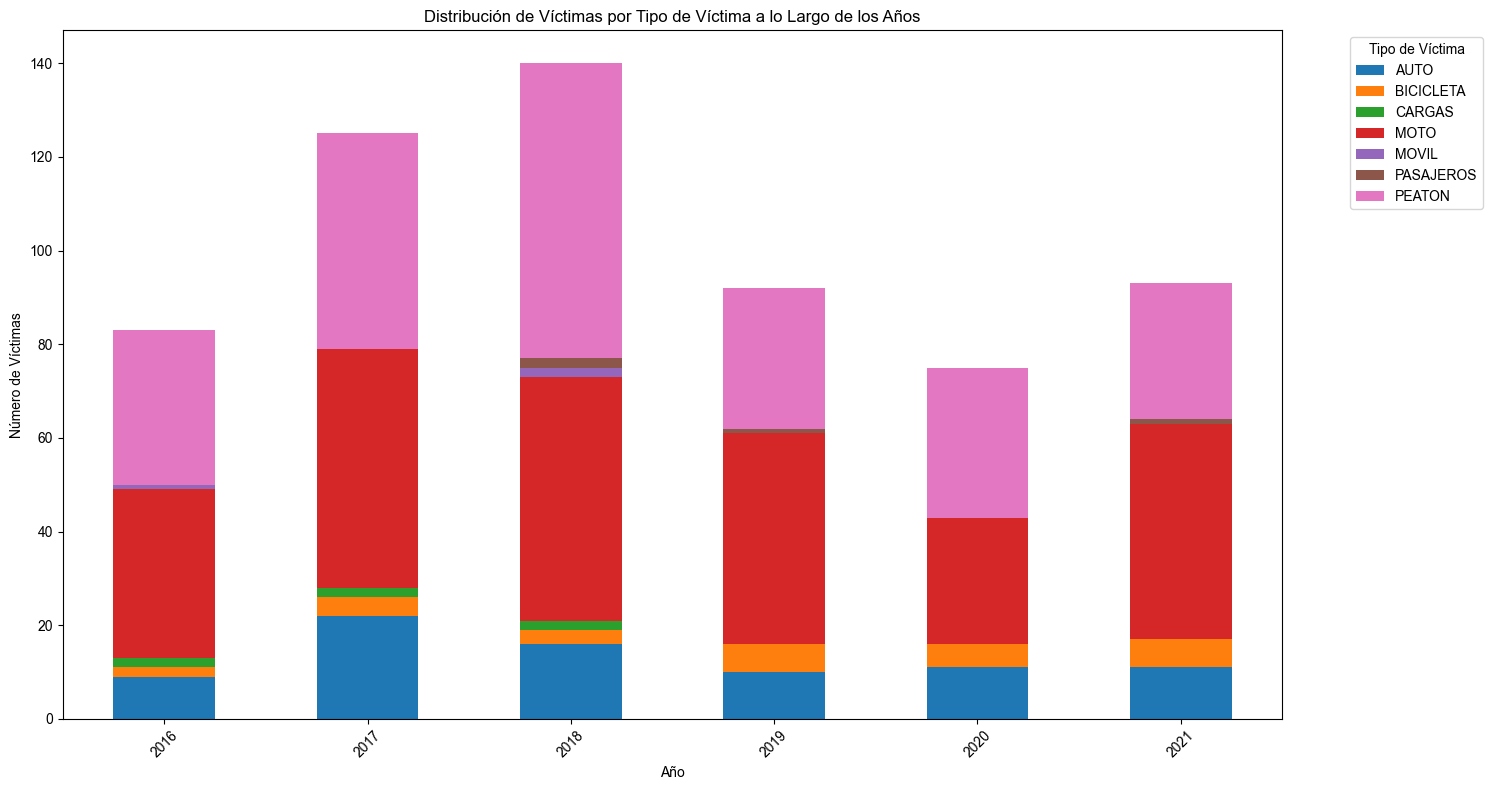

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,PASAJEROS,PEATON
AÑO,,,,,,,
2016,9,2,2,36,1,0,33
2017,22,4,2,51,0,0,46
2018,16,3,2,52,2,2,63
2019,10,6,0,45,0,1,30
2020,11,5,0,27,0,0,32
2021,11,6,0,46,0,1,29


In [49]:
# Visualizacion de datos
victimas_por_anio.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Distribución de Víctimas por Tipo de Víctima a lo Largo de los Años')
plt.ylabel('Número de Víctimas')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Víctima', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
victimas_por_anio


Los accidentes con motos mostraron un aumento considerable en los años 2016 (36) y 2017 (51), alcanzando un pico en 2018 con 52 víctimas. Sin embargo, después de 2018, el número de víctimas por motos disminuyó a 27 en 2020 pobablemente por la pandemia, pero se incrementó nuevamente a 46 en 2021. Las víctimas peatones mostraron una tendencia creciente en 2016 (33) y 2017 (46), alcanzando el punto más alto en 2018 (63). Sin embargo, este número disminuyó en 2019 y 2020. En contraste con las víctimas de ciclistas y en accidentes de carga las cifras son bajas.

#### **Análisis de la relación entre la variable categórica "MES" y la variable "VICTIMA"**

**Se grafica para una mejor visualización**

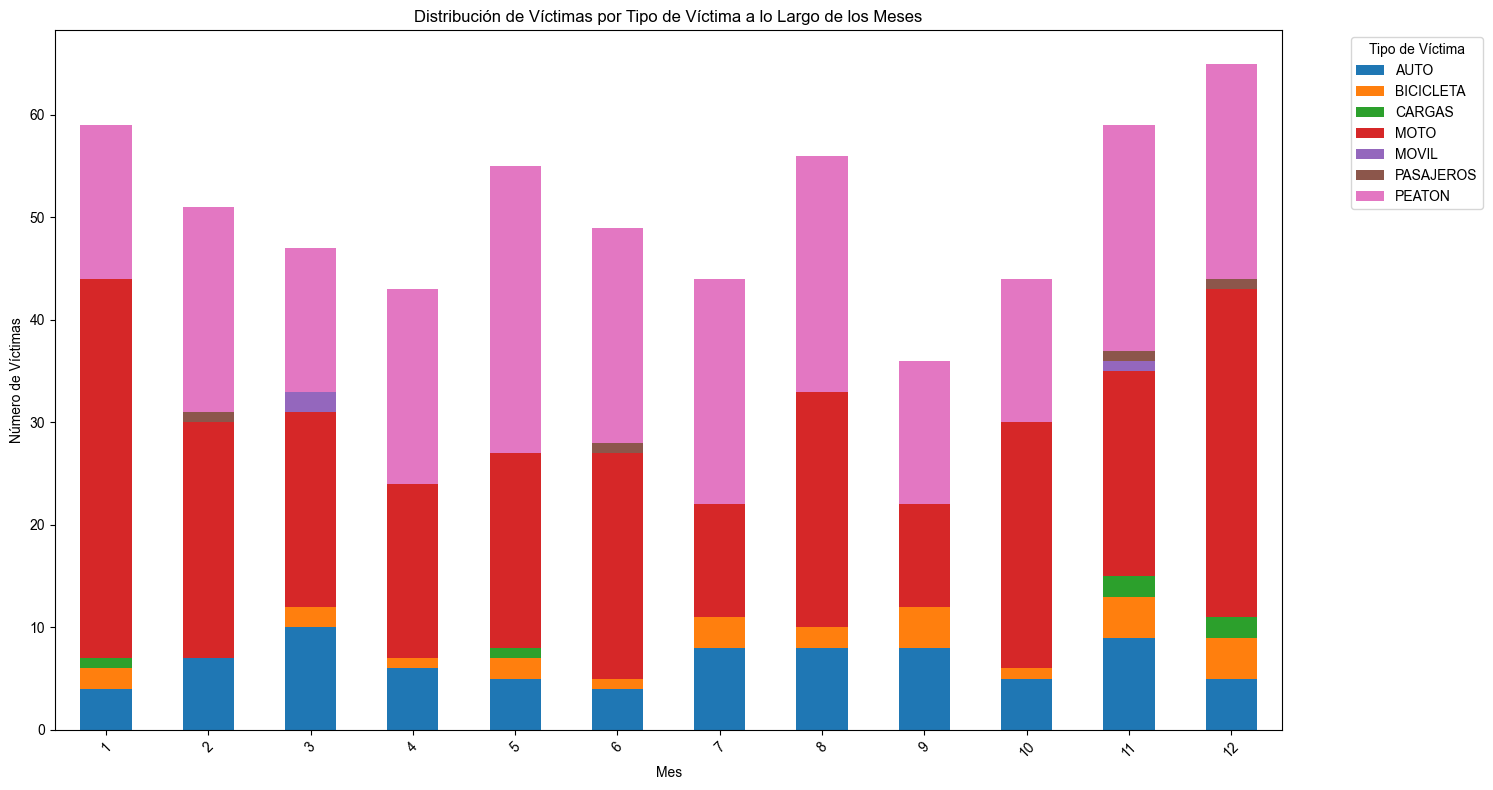

VICTIMA,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,PASAJEROS,PEATON
MES,,,,,,,
1,4,2,1,37,0,0,15
2,7,0,0,23,0,1,20
3,10,2,0,19,2,0,14
4,6,1,0,17,0,0,19
5,5,2,1,19,0,0,28
6,4,1,0,22,0,1,21
7,8,3,0,11,0,0,22
8,8,2,0,23,0,0,23
9,8,4,0,10,0,0,14


In [54]:
# Agrupar por 'MES' y 'VICTIMA' para contar el número de víctimas
victimas_por_mes = mortalidad.groupby(['MES', 'VICTIMA']).size().unstack(fill_value=0)

victimas_por_mes.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title('Distribución de Víctimas por Tipo de Víctima a lo Largo de los Meses')
plt.ylabel('Número de Víctimas')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Víctima', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
victimas_por_mes

### **Fecha_Fallecimiento**

Se divide la fecha de fallecimiento en: Año y mes para una mejor visualización y comprensión.
Se extrae de"FECHA_FALLECIMIENTO" el "Mes_fallecimiento" y el "Año_fallecimiento".

In [55]:
mortalidad['Año_fallecimiento'] = mortalidad['FECHA_FALLECIMIENTO'].dt.year
mortalidad['Mes_fallecimiento'] = mortalidad['FECHA_FALLECIMIENTO'].dt.month

In [56]:
# Conteo de fallecimientos por cada combinación de año y mes.
conteo_fallecimientos = mortalidad.groupby(['Año_fallecimiento', 'Mes_fallecimiento']).size().reset_index(name='Cantidad')
# Conteo de cuántas veces esa víctima ha tenido registros de fallecimiento en el mes y año específicos.
conteo_por_evento = mortalidad.groupby(['VICTIMA', 'Año_fallecimiento', 'Mes_fallecimiento']).size().reset_index(name='Cantidad')


**Se grafica para una mejor visualización**

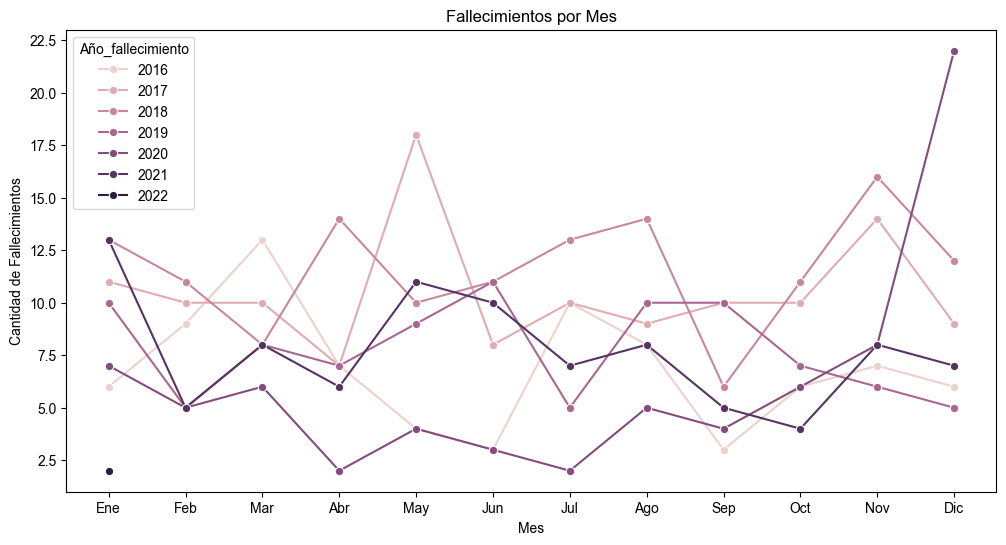

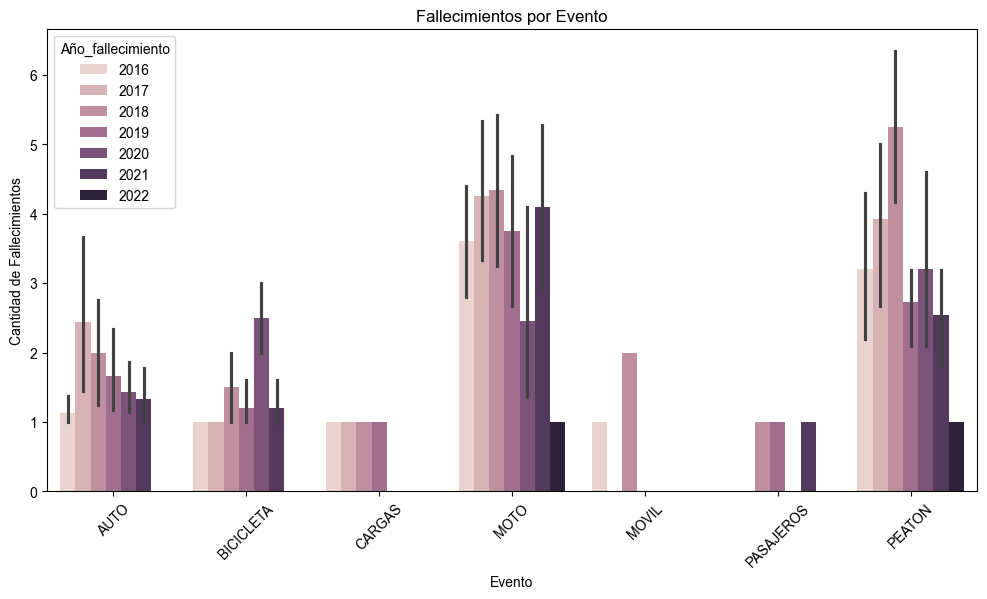

count                              608
mean     2018-11-19 22:32:22.105263104
min                2016-01-01 00:00:00
25%                2017-07-13 18:00:00
50%                2018-09-09 00:00:00
75%                2020-03-11 00:00:00
max                2022-01-03 00:00:00
Name: FECHA_FALLECIMIENTO, dtype: object

In [57]:

# Gráfico de fallecimientos por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=conteo_fallecimientos, x='Mes_fallecimiento', y='Cantidad', hue='Año_fallecimiento', marker='o')
plt.title('Fallecimientos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Fallecimientos')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

# Gráfico de fallecimientos por evento
plt.figure(figsize=(12, 6))
sns.barplot(data=conteo_por_evento, x='VICTIMA', y='Cantidad', hue='Año_fallecimiento')
plt.title('Fallecimientos por Evento')
plt.xlabel('Evento')
plt.ylabel('Cantidad de Fallecimientos')
plt.xticks(rotation=45)
plt.show()
mortalidad["FECHA_FALLECIMIENTO"].describe()

**Fecha_Fallecimiento:** La fecha más temprana registrada es 1 de enero de 2016 y la más reciente es 3 de enero de 2022. Esto sugiere que los datos abarcan un período de aproximadamente 6 años.La fecha promedio (mean) es 19 de noviembre de 2018, lo que sugiere que, en términos generales, la mayoría de los fallecimientos se concentran en torno a esta fecha, se investigo y almenos en los periodicos nacionales no registrar muertes por siniestros viales.
******
******

In [62]:
mortalidad.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FECHA                608 non-null    datetime64[ns]
 1   AÑO                  608 non-null    int64         
 2   MES                  608 non-null    int64         
 3   DIA                  608 non-null    int64         
 4   ROL                  608 non-null    object        
 5   VICTIMA              608 non-null    object        
 6   SEXO                 608 non-null    object        
 7   EDAD                 608 non-null    int64         
 8   FECHA_FALLECIMIENTO  608 non-null    datetime64[ns]
 9   Año_fallecimiento    608 non-null    int32         
 10  Mes_fallecimiento    608 non-null    int32         
 11  Rango_Edad           608 non-null    category      
dtypes: category(1), datetime64[ns](2), int32(2), int64(4), object(3)
memory usage: 48.6+ KB


# 4.3 Análisis Multivariado

**Teniendo los análisis bivariados de las variables independientes con la variable dependiente, se realizará un análisis multivariado de variables que considero críticas, esto para verificar si disminuyo el 7% en la cantidad de accidentes mortales de motociclistas en el último año 2019, en CABA, respecto al año anterior 2018.** 


**Se filtran los datos por las variables que se necesitan para el año 2018 y 2019**

In [90]:
# Filtrar datos para motociclistas hombres en 2018 y 2019
motociclistas = mortalidad[
    (mortalidad['ROL'].isin(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE'])) &
    (mortalidad['Año_fallecimiento'].isin([2018, 2019]))]

Contar Accidentes por Año

In [91]:
accidentes_por_año = motociclistas['Año_fallecimiento'].value_counts().reset_index()
accidentes_por_año.columns = ['Año', 'Cantidad']


In [92]:
print(accidentes_por_año)

    Año  Cantidad
0  2018        73
1  2019        57


**Se grafica para una mejor visualización**

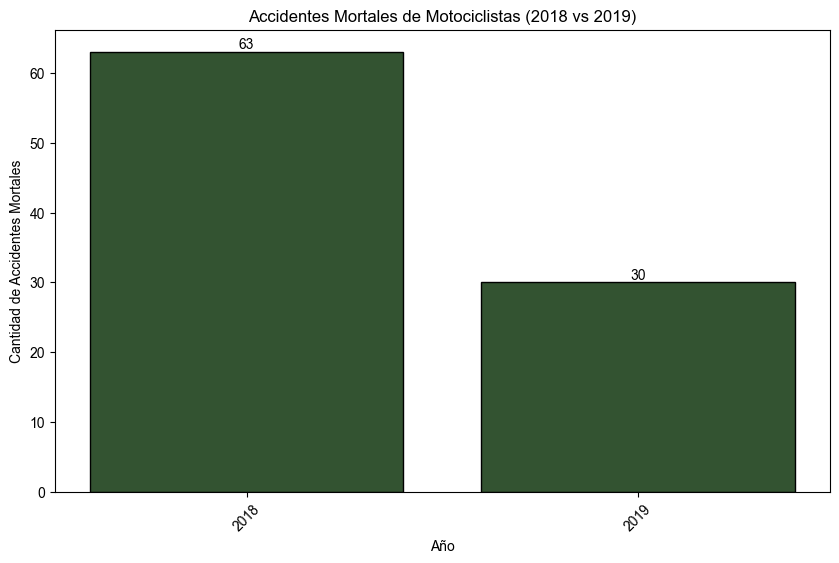

In [106]:
# Visualización de datos 
plt.figure(figsize=(10, 6))
bars = plt.bar(accidentes_por_año['Año'].astype(str), accidentes_por_año['Cantidad'], color='#335331', edgecolor='black')
plt.title('Accidentes Mortales de Motociclistas (2018 vs 2019)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes Mortales')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()  
    plt.annotate(f'{yval}', 
                 xy=(bar.get_x() + bar.get_width() / 2, yval), 
                 ha='center', 
                 va='bottom') 
plt.show()


In [86]:
# Cantidades de accidentes mortales por año
victimas_2018 = 73
victimas_2019 = 57
disminucion = victimas_2018 - victimas_2019
porcentaje_disminucion = (disminucion / victimas_2018) * 100
print(f"Cantidad de victimas mortales  en 2018: {victimas_2018}")
print(f"Cantidad de victimas mortales en 2019: {victimas_2019}")
print(f"Disminución: {disminucion}")
print(f"Porcentaje de disminución: {porcentaje_disminucion:.2f}%")


Cantidad de victimas mortales  en 2018: 73
Cantidad de victimas mortales en 2019: 57
Disminución: 16
Porcentaje de disminución: 21.92%


Hay una disminución del 21.92%% en el número de accidentes mortales de motociclistas conductores y acompañantes de 2018 a 2019. Esto sugiere que ha habido una mejora en la seguridad para este grupo durante el año 2019. Se va a corroboral al calcular el  2 KPI
********



**Teniendo los análisis bivariados de las variables independientes con la variable dependiente, se realizará un análisis multivariado de variables que considero críticas, esto para verificar si la disminuyo el 10% en la cantidad accidentes mortales de peatones en el último año 2019, en CABA, respecto al año anterior 2018.** 

In [98]:
victimas_peatones = mortalidad[
    (mortalidad['ROL'] == 'PEATON') &
    (mortalidad['Año_fallecimiento'].isin([2018, 2019]))]

In [100]:
accidentes_por_año = victimas_peatones['Año_fallecimiento'].value_counts().reset_index()
accidentes_por_año.columns = ['Año', 'Cantidad']


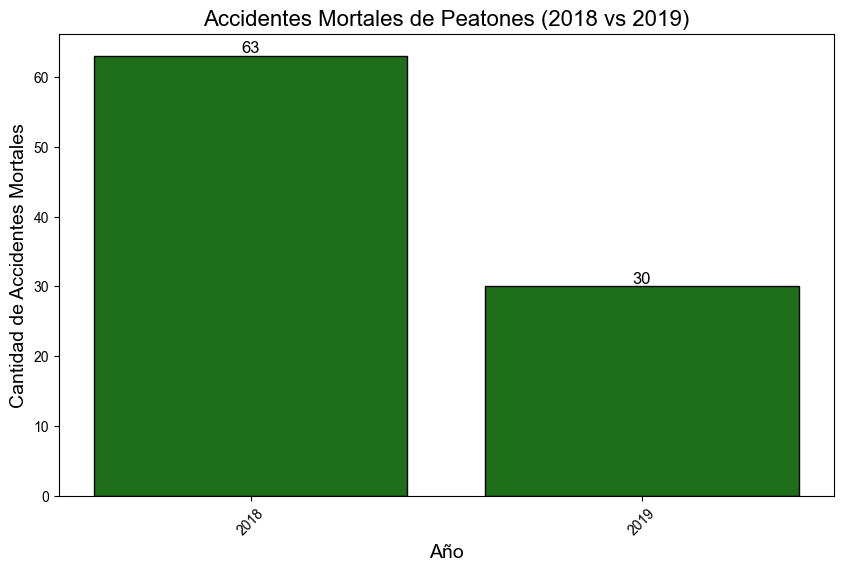

In [105]:
#Visualizacion de la gráfica
plt.figure(figsize=(10, 6))
bars = plt.bar(accidentes_por_año['Año'].astype(str), accidentes_por_año['Cantidad'], color='#1f6e19', edgecolor='black')

# Agregar etiquetas a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.title('Accidentes Mortales de Peatones (2018 vs 2019)', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Accidentes Mortales', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [102]:
# Cantidades de accidentes mortales por año
peatones_2018 = 63
peatones_2019 = 30
disminucion = peatones_2018 - peatones_2019
porcentaje_disminucion = (disminucion / peatones_2018) * 100
print(f"Cantidad de victimas mortales  en 2018: {peatones_2018}")
print(f"Cantidad de victimas mortales en 2019: {peatones_2019}")
print(f"Disminución: {disminucion}")
print(f"Porcentaje de disminución: {porcentaje_disminucion:.2f}%")

Cantidad de victimas mortales  en 2018: 63
Cantidad de victimas mortales en 2019: 30
Disminución: 33
Porcentaje de disminución: 52.38%


Las víctimas mortales de peatones entre 2018 y 2019 disminuyeron significativamente en la cantidad de fallecimientos. En 2018, se registraron 63 víctimas mortales, mientras que en 2019 la cifra se redujo a 30 víctimas. Esto representa una disminución absoluta de 33 víctimas, lo que equivale a un 52.38% de reducción. Se podría inferir que se realizaron campañas de seguridad vial que como consecuencia mejoraron las estadisticas de mortalidad de la ciudad.

### **4.4 KPI 2: Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año 2019, en CABA, respecto al año anterior2018.**

In [88]:
victimas_2018 
victimas_2019  

# Calcular la tasa de reducción
tasa_reduccion = (victimas_2018  - victimas_2019  ) / victimas_2018  * 100

# Mostrar resultados
print(f"Número de accidentes en 2018: {victimas_2018}")
print(f"Número de accidentes en 2019: {victimas_2019}")
print(f"Tasa de reducción: {tasa_reduccion:.2f}%")

# Verificar si se alcanzó el objetivo de reducción del 7%
objetivo_reduccion = 7  # Tasa de reducción deseada

if tasa_reduccion >= objetivo_reduccion:
    print("Se logró reducir la cantidad de accidentes mortales de motociclistas en mas del 7%.")


Número de accidentes en 2018: 73
Número de accidentes en 2019: 57
Tasa de reducción: 21.92%
Se logró reducir la cantidad de accidentes mortales de motociclistas en mas del 7%.


### **4.4 KPI 3 : Reducir en un 15% la cantidad de accidentes mortales de peatones en el último año 2019, en CABA, respecto al año anterior 2018.**

In [104]:
peatones_2018
peatones_2019

# Calcular la tasa de reducción
tasa_reduccion = (peatones_2018  - peatones_2019  ) / peatones_2018  * 100

# Mostrar resultados
print(f"Número de accidentes mortales de peatones en 2018: {peatones_2018}")
print(f"Número de accidentes mortales de peatonesen 2019: {peatones_2019}")
print(f"Tasa de reducción: {tasa_reduccion:.2f}%")

# Verificar si se alcanzó el objetivo de reducción del 15%
objetivo_reduccion = 15  # Tasa de reducción deseada

if tasa_reduccion >= objetivo_reduccion:
    print("Se logró reducir la cantidad de accidentes mortales de motociclistas en mas del 15%.")

Número de accidentes mortales de peatones en 2018: 63
Número de accidentes mortales de peatonesen 2019: 30
Tasa de reducción: 52.38%
Se logró reducir la cantidad de accidentes mortales de motociclistas en mas del 15%.


In [ ]:
mortalidad

In [108]:
mortalidad.to_excel('mortalidad_analizado.xlsx', index=False, engine='openpyxl')  